# 统计学习导论第六次作业
作业内容：决策树的辅助使用

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、数据导入
数据来源：阿里云天池提供的【Give Me Some Credit给我一些信誉】
地址：https://tianchi.aliyun.com/dataset/89334

In [1]:
####--------------------------------统计学习导论第六次作业（决策树的辅助使用）--------------------------------####
import pandas as pd

#--------------------------------1、数据导入--------------------------------#

df_train = pd.read_csv("/Users/ouyangruizhi/Desktop/python/统计学习导论/信用评分/cs-training.csv")
df_test = pd.read_csv("/Users/ouyangruizhi/Desktop/python/统计学习导论/信用评分/cs-test.csv")

# 展示前五行数据
print('前五行数据：')
print(df_train.head())

前五行数据：
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13            

## 二、决策树分组处理缺失值
先使用决策树对观测分组，再在组内使用中位数插补
### 2.1 缺失情况

In [2]:
#--------------------------------2、决策树处理缺失值--------------------------------#
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 缺失值检测与处理
# 缺失比例
print('缺失值情况及比例：')
total_rows = df_train.shape[0]
missing_value_sums = df_train.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
Unnamed: 0: 缺失值数量为 0，缺失值比例为 0.00%
SeriousDlqin2yrs: 缺失值数量为 0，缺失值比例为 0.00%
RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%
age: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime30-59DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
DebtRatio: 缺失值数量为 0，缺失值比例为 0.00%
MonthlyIncome: 缺失值数量为 29731，缺失值比例为 19.82%
NumberOfOpenCreditLinesAndLoans: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTimes90DaysLate: 缺失值数量为 0，缺失值比例为 0.00%
NumberRealEstateLoansOrLines: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime60-89DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfDependents: 缺失值数量为 3924，缺失值比例为 2.62%


### 2.2 构建决策树
在此分成10组

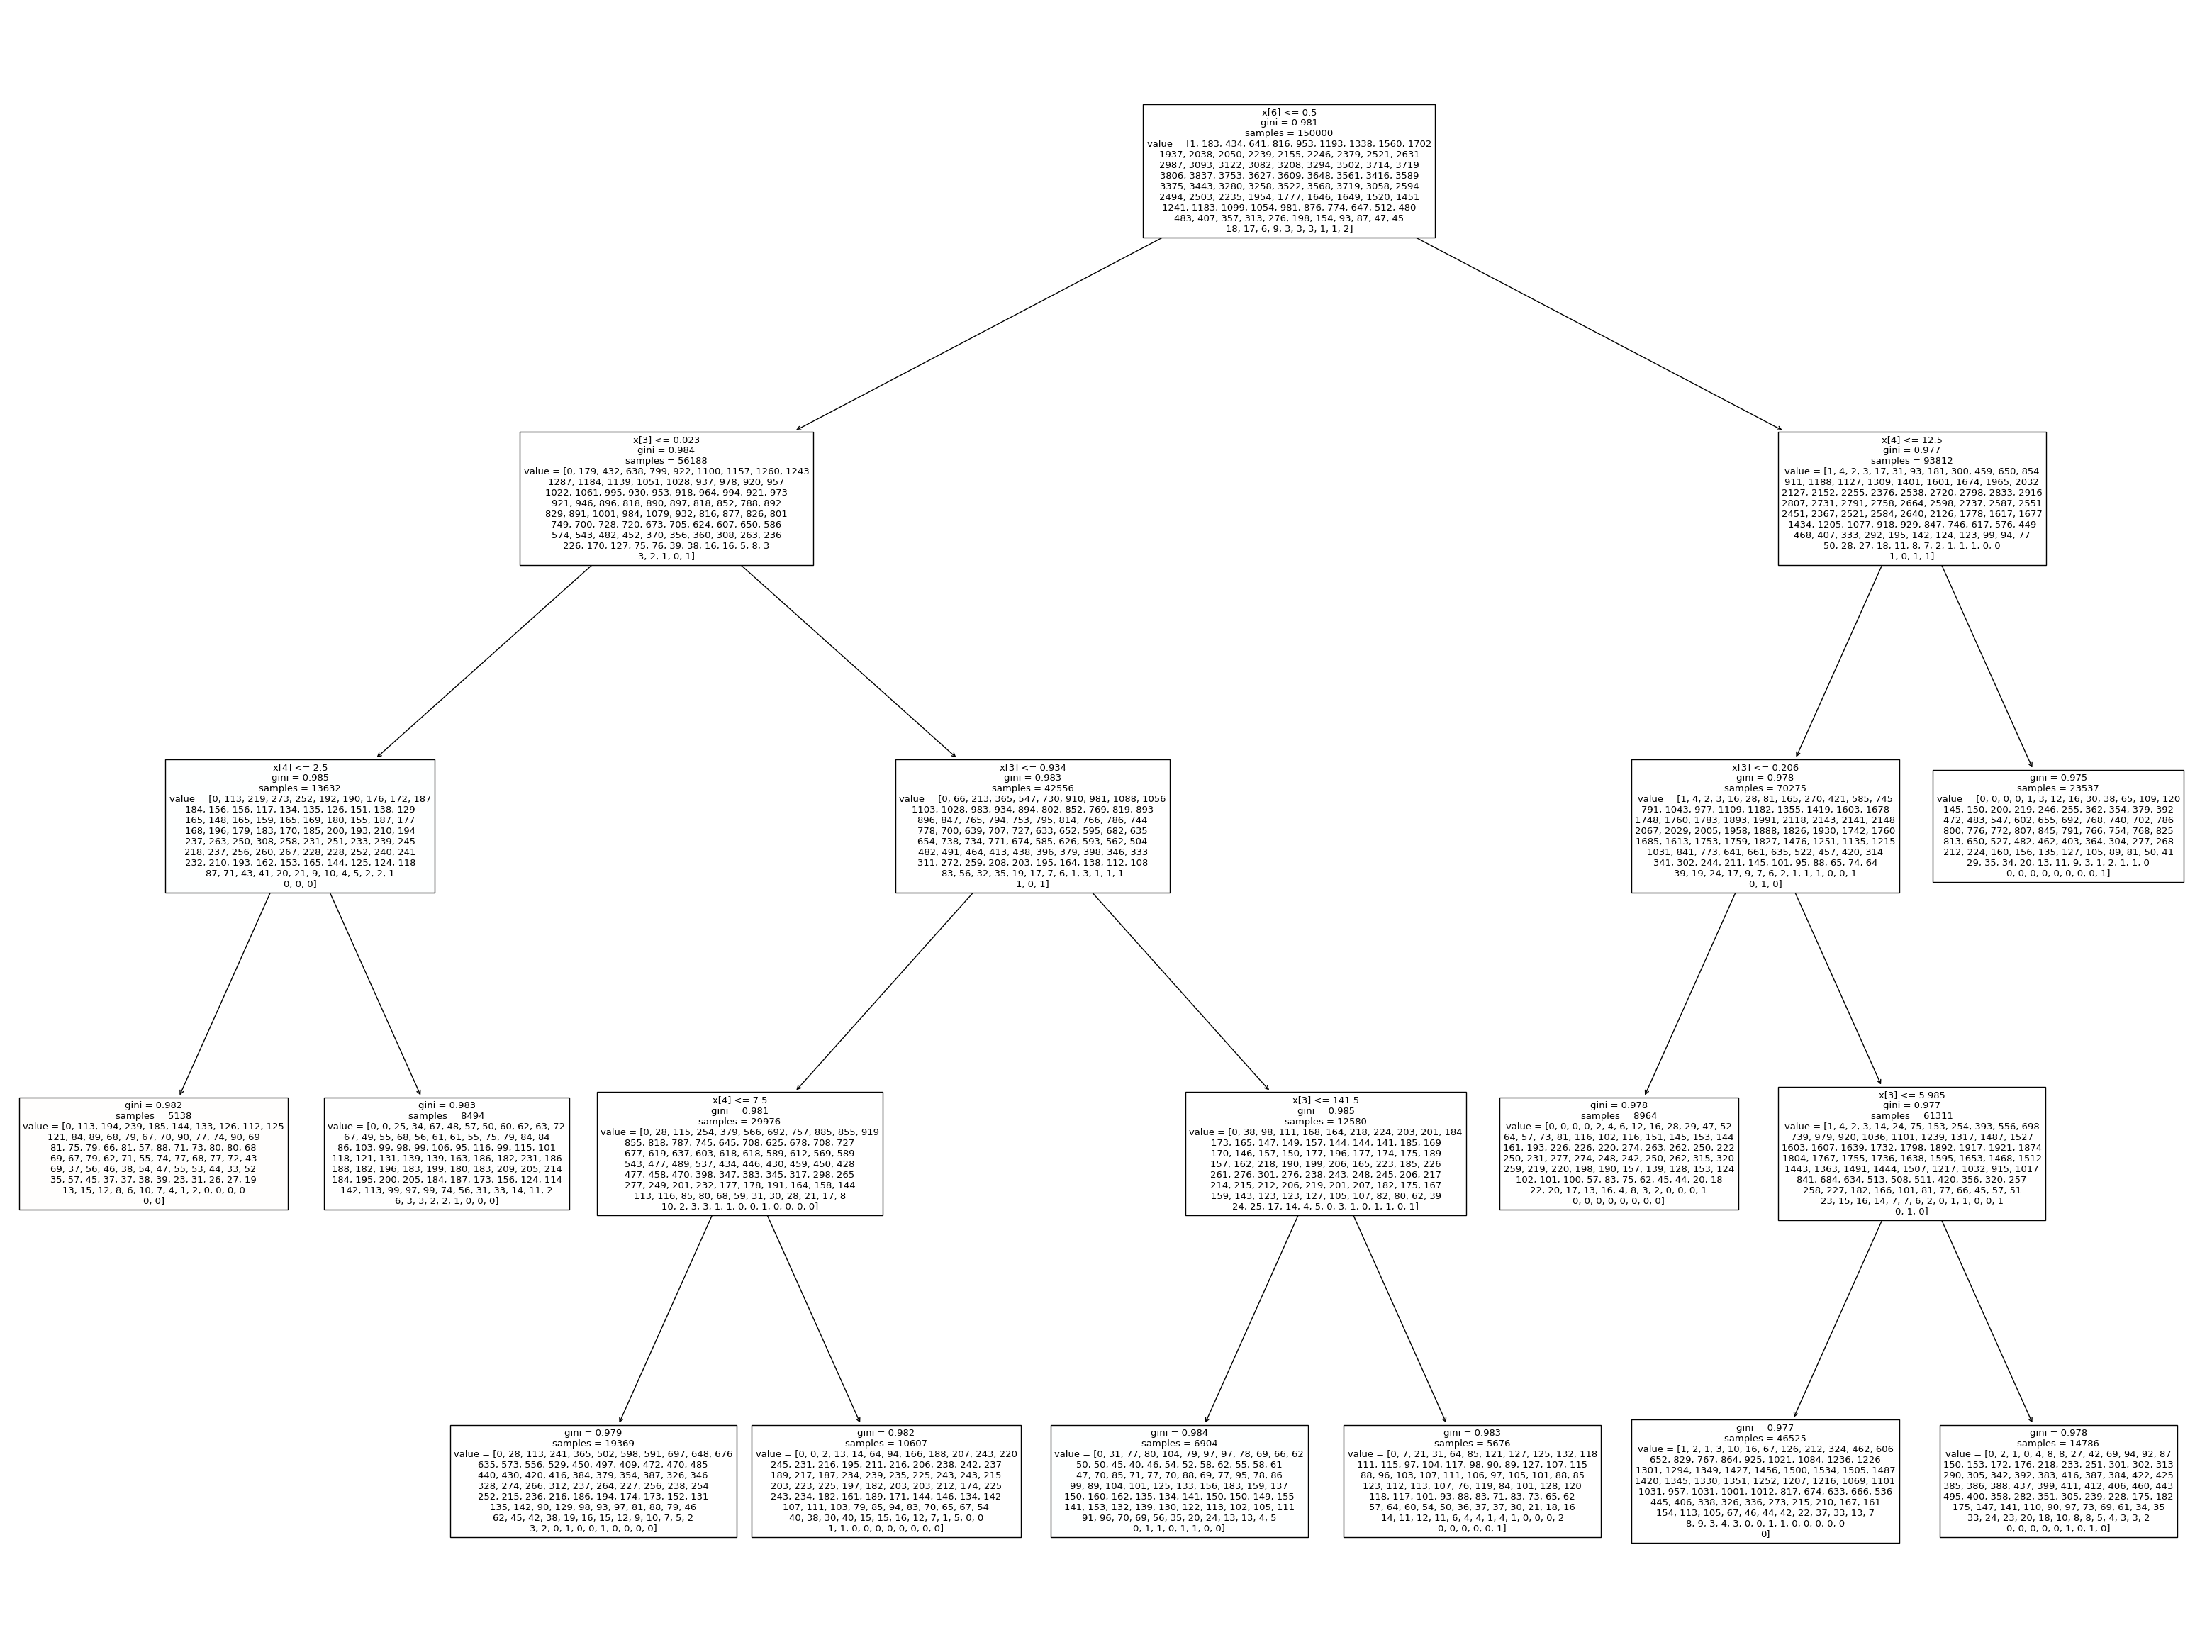

In [3]:
# 决策树分组处理缺失值
X = df_train[['SeriousDlqin2yrs', 'SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse',
              'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']]

y = df_train[['age']]

DecisionTree_model = DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=200,
    max_depth=5,
    max_leaf_nodes=10
)

DecisionTree_model.fit(X, y)

# 绘制决策树
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(DecisionTree_model, filled=True, ax=ax)
plt.savefig('【处理缺失值】决策树结构.png')

### 2.3 组内中位数插补

In [4]:
# 分组
leaf_nodes_assignment = DecisionTree_model.apply(X)
df_train['leaf_node_group'] = leaf_nodes_assignment

# 组内中位数插补
features_with_missing = ['MonthlyIncome', 'NumberOfDependents']

for feature in features_with_missing:
    for group in df_train['leaf_node_group'].unique():
        group_data = df_train[df_train['leaf_node_group'] == group]
        median_value = group_data[feature].median()
        df_train.loc[(df_train['leaf_node_group'] == group) & (df_train[feature].isnull()), feature] = median_value

### 2.4 再次确认缺失值情况

In [5]:
# 再次查看缺失值比例
print('缺失值情况及比例：')
total_rows = df_train.shape[0]
missing_value_sums = df_train.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
Unnamed: 0: 缺失值数量为 0，缺失值比例为 0.00%
SeriousDlqin2yrs: 缺失值数量为 0，缺失值比例为 0.00%
RevolvingUtilizationOfUnsecuredLines: 缺失值数量为 0，缺失值比例为 0.00%
age: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime30-59DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
DebtRatio: 缺失值数量为 0，缺失值比例为 0.00%
MonthlyIncome: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfOpenCreditLinesAndLoans: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTimes90DaysLate: 缺失值数量为 0，缺失值比例为 0.00%
NumberRealEstateLoansOrLines: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfTime60-89DaysPastDueNotWorse: 缺失值数量为 0，缺失值比例为 0.00%
NumberOfDependents: 缺失值数量为 0，缺失值比例为 0.00%
leaf_node_group: 缺失值数量为 0，缺失值比例为 0.00%


## 三、决策树实现特征分箱
连续数据离散化

   Unnamed: 0  SeriousDlqin2yrs  bin_age_num  \
0           1                 1            2   
1           2                 0            1   
2           3                 0            1   
3           4                 0            0   
4           5                 0            2   

   bin_NumberOfTime30-59DaysPastDueNotWorse_num  bin_DebtRatio_num  \
0                                             2                  5   
1                                             0                  2   
2                                             1                  2   
3                                             0                  2   
4                                             1                  2   

   bin_MonthlyIncome_num  bin_NumberOfTimes90DaysLate_num  \
0                      6                                0   
1                      2                                0   
2                      2                                1   
3                      2                      

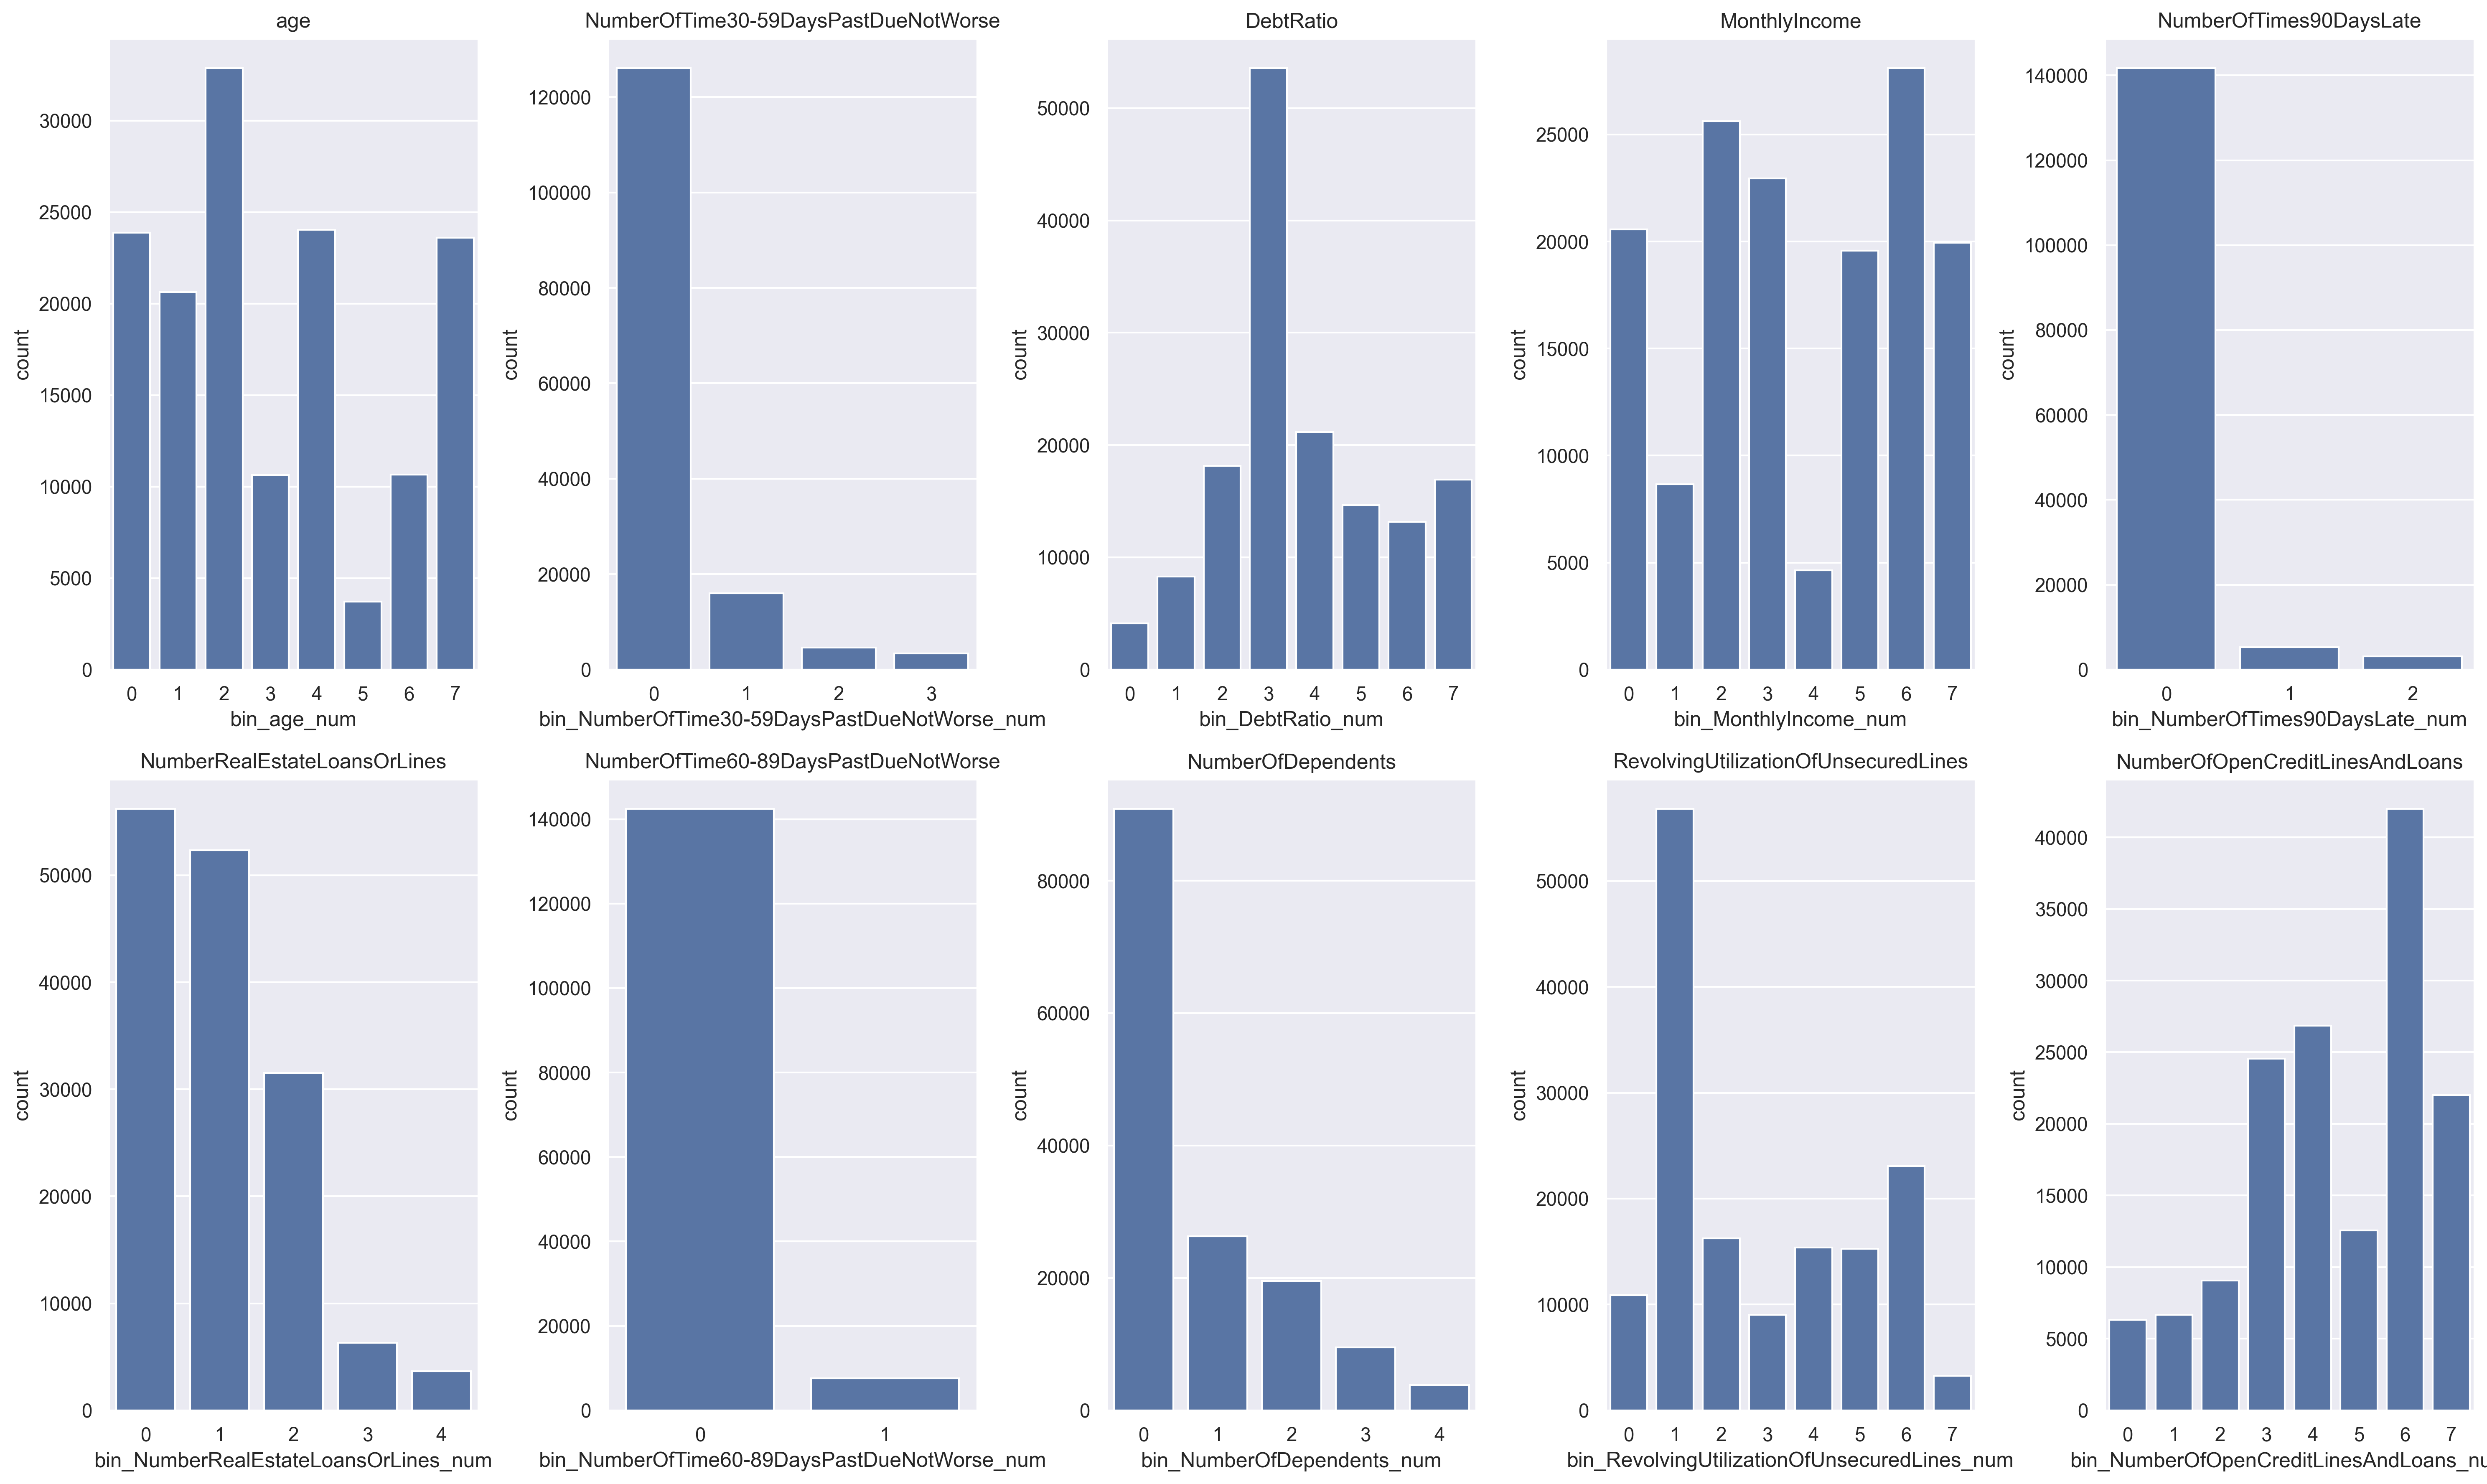

In [6]:
#--------------------------------3、决策树实现特征分箱--------------------------------#
# 定义决策树分箱函数
train_bin_cutoffs = {}
def tree_bin(feature_column, target_column):
    """
    基于决策树进行特征分箱的函数

    参数:
        feature_column (str): 要进行分箱的特征列名
        target_column (str): 目标列名

    返回:
        list: 分箱的边界点列表
    """
    # 准备数据
    X = np.array(df_train[feature_column]).reshape(-1, 1)
    y = df_train[target_column]

    # 训练决策树模型
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.02, max_leaf_nodes=8)
    clf.fit(X, y)

    cut_points = []
    node_count = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold

    for i in range(node_count):
        # 该节点是叶子节点，不存在分支
        if children_left[i]!= children_right[i]:
            # 将分支节点加入分箱边界
            cut_points.append(threshold[i])

    cut_points.sort()
    cut_points = [df_train[feature_column].min() - 0.1] + cut_points + [df_train[feature_column].max() + 0.1]

    train_bin_cutoffs[feature_column] = cut_points

    return cut_points

# 要进行分箱的特征列名列表
features_to_bin = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate',
                   'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
                   'RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans']

# 目标列名
target_column = 'SeriousDlqin2yrs'

# 对每个特征进行分箱操作
for feature in features_to_bin:
    cut_points = tree_bin(feature, target_column)
    df_train['bin_' + feature] = pd.cut(df_train[feature], bins=cut_points)

# 结果可视化
for feature in features_to_bin:
    df_train['bin_' + feature + '_num'] = df_train['bin_' + feature].cat.codes

sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), dpi=300)
axes = axes.flatten()

for i, feature in enumerate(features_to_bin):
    ax = axes[i]

    sns.countplot(data=df_train, x='bin_' + feature + '_num', ax=ax)

    ax.set_title(feature)

plt.tight_layout()
plt.savefig(fname="决策树分箱结果.png")

df_train = df_train.drop(columns=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'leaf_node_group', 'bin_age',
       'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_DebtRatio',
       'bin_MonthlyIncome', 'bin_NumberOfTimes90DaysLate',
       'bin_NumberRealEstateLoansOrLines',
       'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfDependents',
       'bin_RevolvingUtilizationOfUnsecuredLines',
       'bin_NumberOfOpenCreditLinesAndLoans'])

print(df_train.head())


## 四、决策树实现交互作用检测
先计算一个指标的准确度，再计算交互时两个指标的准确度，两两组合，通过准确度大小判断有无交互作用

In [8]:
#--------------------------------4、决策树实现交互作用检测--------------------------------#
from sklearn.metrics import accuracy_score
import itertools
from sklearn.model_selection import train_test_split

features_for_interaction = ['bin_age_num', 'bin_NumberOfTime30-59DaysPastDueNotWorse_num', 'bin_DebtRatio_num',
                             'bin_MonthlyIncome_num', 'bin_NumberOfTimes90DaysLate_num',
                             'bin_NumberRealEstateLoansOrLines_num', 'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
                             'bin_NumberOfDependents_num', 'bin_RevolvingUtilizationOfUnsecuredLines_num',
                             'bin_NumberOfOpenCreditLinesAndLoans_num']
X_interaction = df_train[features_for_interaction]
y_interaction = df_train['SeriousDlqin2yrs']

# 构建决策树模型
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_interaction, y_interaction)

# 计算单变量重要性
feature_importances_single = dt_model.feature_importances_

# 用于存储单个特征准确率的字典
accuracy_single_dict = {}
# 计算每个单个特征的准确率
for feature in features_for_interaction:
    X_single = X_interaction[[feature]]
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_interaction, test_size=0.2, random_state=42)
    dt_model_single = DecisionTreeClassifier(random_state=42)
    dt_model_single.fit(X_train_single, y_train_single)
    y_pred_single = dt_model_single.predict(X_test_single)
    accuracy_single = accuracy_score(y_test_single, y_pred_single)
    accuracy_single_dict[feature] = accuracy_single

# 检测变量两两组合的交互作用
interactions = []
for feature_pair in itertools.combinations(features_for_interaction, 2):
    X_pair = X_interaction[list(feature_pair)]
    X_pair['interaction_feature'] = X_pair[feature_pair[0]] * X_pair[feature_pair[1]]

    X_train_pair, X_test_pair, y_train_pair, y_test_pair = train_test_split(X_pair, y_interaction, test_size=0.2, random_state=42)
    dt_model_pair = DecisionTreeClassifier(random_state=42)
    dt_model_pair.fit(X_train_pair, y_train_pair)

    y_pred_pair = dt_model_pair.predict(X_test_pair)
    accuracy_pair = accuracy_score(y_test_pair, y_pred_pair)
    interactions.append({'features': feature_pair, 'accuracy': accuracy_pair})

# 输出交互作用结果
for interaction in interactions:
    feature1, feature2 = interaction['features']
    accuracy_single_1 = accuracy_single_dict[feature1]
    accuracy_single_2 = accuracy_single_dict[feature2]
    accuracy_pair = interaction['accuracy']
    # 判断是否存在交互作用（简单对比，可根据实际情况调整判断逻辑）
    if accuracy_pair > max(accuracy_single_1, accuracy_single_2):
        interaction_result = "存在交互作用"
    else:
        interaction_result = "不存在交互作用"
    print(f"Features: {interaction['features']}, Single Feature Accuracy 1: {accuracy_single_1:.4f}, "
          f"Single Feature Accuracy 2: {accuracy_single_2:.4f}, Combined Feature Accuracy: {accuracy_pair:.4f}, "
          f"Interaction Result: {interaction_result}")

Features: ('bin_age_num', 'bin_NumberOfTime30-59DaysPastDueNotWorse_num'), Single Feature Accuracy 1: 0.9348, Single Feature Accuracy 2: 0.9348, Combined Feature Accuracy: 0.9348, Interaction Result: 不存在交互作用
Features: ('bin_age_num', 'bin_DebtRatio_num'), Single Feature Accuracy 1: 0.9348, Single Feature Accuracy 2: 0.9348, Combined Feature Accuracy: 0.9348, Interaction Result: 不存在交互作用
Features: ('bin_age_num', 'bin_MonthlyIncome_num'), Single Feature Accuracy 1: 0.9348, Single Feature Accuracy 2: 0.9348, Combined Feature Accuracy: 0.9348, Interaction Result: 不存在交互作用
Features: ('bin_age_num', 'bin_NumberOfTimes90DaysLate_num'), Single Feature Accuracy 1: 0.9348, Single Feature Accuracy 2: 0.9353, Combined Feature Accuracy: 0.9353, Interaction Result: 不存在交互作用
Features: ('bin_age_num', 'bin_NumberRealEstateLoansOrLines_num'), Single Feature Accuracy 1: 0.9348, Single Feature Accuracy 2: 0.9348, Combined Feature Accuracy: 0.9348, Interaction Result: 不存在交互作用
Features: ('bin_age_num', 'bin_

## 五、决策树实现分层回归
先使用决策树将数据分成两组，在分组建立Logistic回归模型
### 5.1 决策树分组

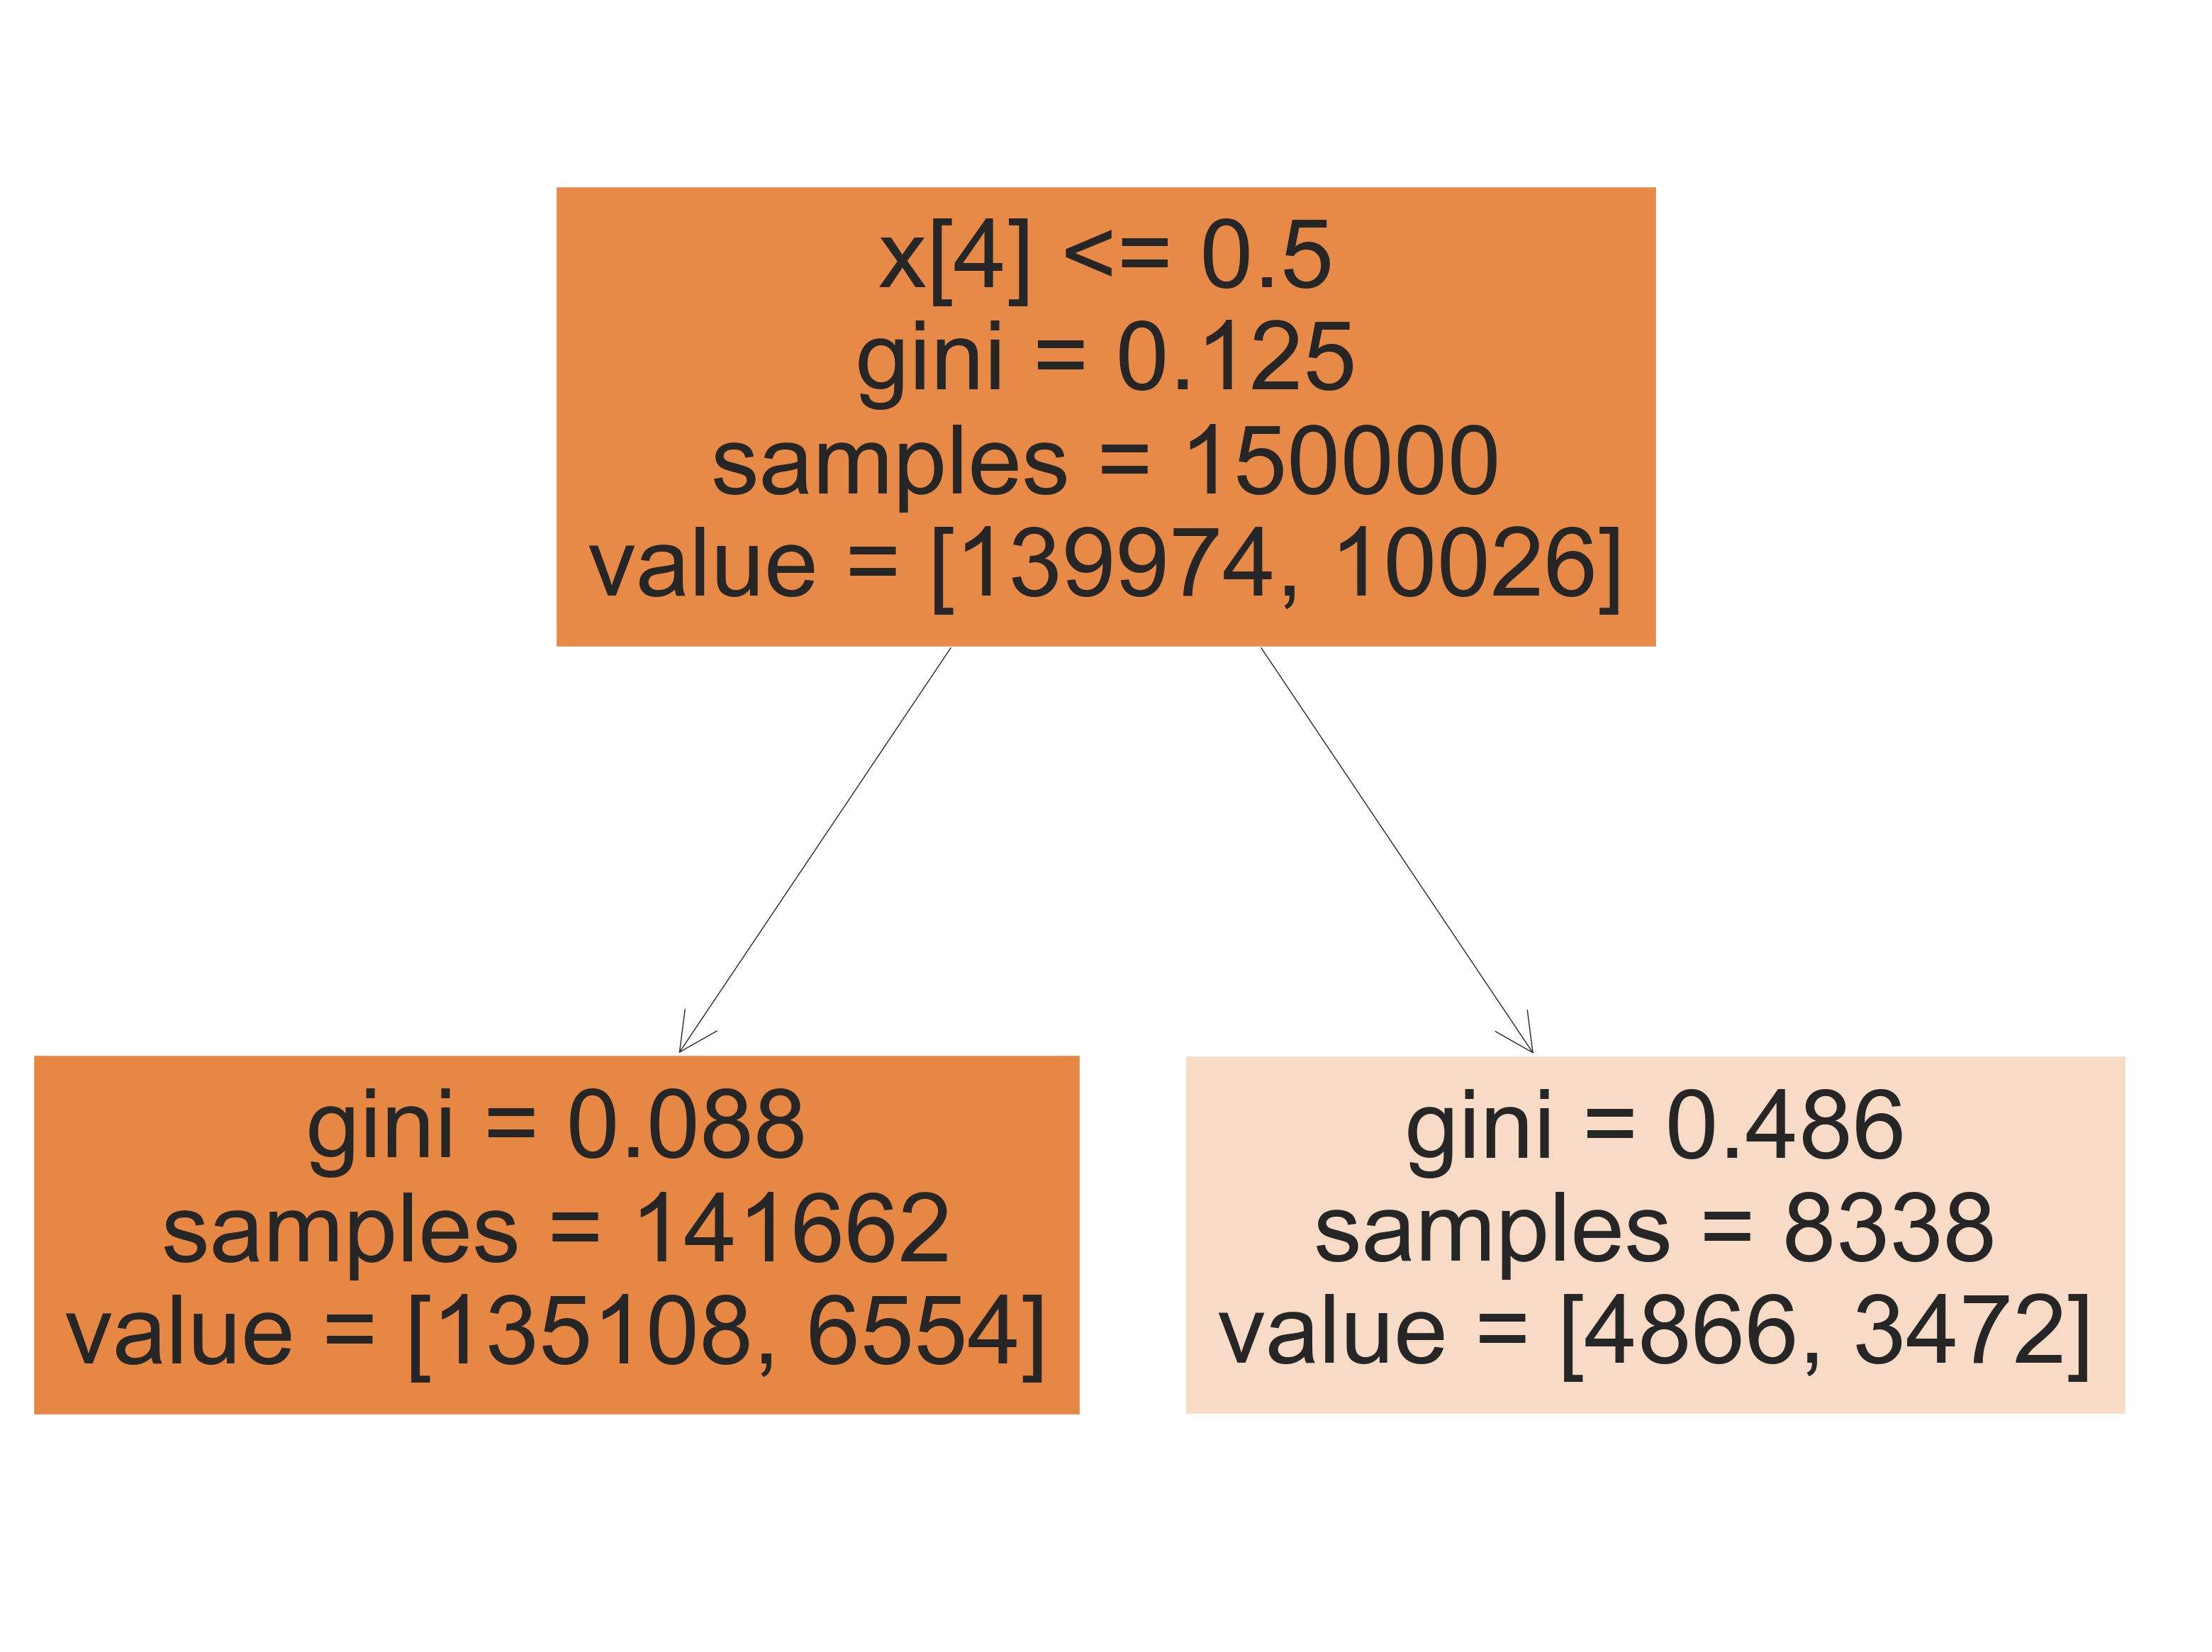

In [10]:
#--------------------------------5、决策树实现分层回归--------------------------------#
from sklearn.linear_model import LogisticRegression

features= ['bin_age_num', 'bin_NumberOfTime30-59DaysPastDueNotWorse_num', 'bin_DebtRatio_num',
           'bin_MonthlyIncome_num', 'bin_NumberOfTimes90DaysLate_num',
           'bin_NumberRealEstateLoansOrLines_num', 'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
           'bin_NumberOfDependents_num', 'bin_RevolvingUtilizationOfUnsecuredLines_num',
           'bin_NumberOfOpenCreditLinesAndLoans_num']
X = df_train[features]
y = df_train['SeriousDlqin2yrs']
model = DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=200,
    max_depth=2,
    max_leaf_nodes=2
)
model.fit(X, y)

# 绘制决策树
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(model, filled=True, ax=ax)
plt.savefig('【分层回归】决策树结构.png')

### 5.2 分层Logitic回归

In [11]:
# 分组
assignment = model.apply(X)
df_train['group'] = assignment

group_0_data = df_train[df_train['group'] == 1]
group_1_data = df_train[df_train['group'] == 2]

X_group_0 = group_0_data[['bin_age_num', 'bin_NumberOfTime30-59DaysPastDueNotWorse_num', 'bin_DebtRatio_num',
                          'bin_MonthlyIncome_num', 'bin_NumberOfTimes90DaysLate_num',
                          'bin_NumberRealEstateLoansOrLines_num', 'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
                          'bin_NumberOfDependents_num', 'bin_RevolvingUtilizationOfUnsecuredLines_num',
                          'bin_NumberOfOpenCreditLinesAndLoans_num']]
y_group_0 = group_0_data['SeriousDlqin2yrs']

X_group_1 = group_1_data[['bin_age_num', 'bin_NumberOfTime30-59DaysPastDueNotWorse_num', 'bin_DebtRatio_num',
                          'bin_MonthlyIncome_num', 'bin_NumberOfTimes90DaysLate_num',
                          'bin_NumberRealEstateLoansOrLines_num', 'bin_NumberOfTime60-89DaysPastDueNotWorse_num',
                          'bin_NumberOfDependents_num', 'bin_RevolvingUtilizationOfUnsecuredLines_num',
                          'bin_NumberOfOpenCreditLinesAndLoans_num']]
y_group_1 = group_1_data['SeriousDlqin2yrs']

# 划分训练集和测试集
X_train_group_0, X_test_group_0, y_train_group_0, y_test_group_0 = train_test_split(X_group_0, y_group_0, test_size=0.2, random_state=42)
X_train_group_1, X_test_group_1, y_train_group_1, y_test_group_1 = train_test_split(X_group_1, y_group_1, test_size=0.2, random_state=42)

# 第一组Logistic回归
logistic_model_group_0 = LogisticRegression()
logistic_model_group_0.fit(X_train_group_0, y_train_group_0)
y_pred_group_0 = logistic_model_group_0.predict(X_test_group_0)
accuracy_group_0 = accuracy_score(y_test_group_0, y_pred_group_0)

# 第二组Logistic回归
logistic_model_group_1 = LogisticRegression()
logistic_model_group_1.fit(X_train_group_1, y_train_group_1)
y_pred_group_1 = logistic_model_group_1.predict(X_test_group_1)
accuracy_group_1 = accuracy_score(y_test_group_1, y_pred_group_1)

print("第一组数据逻辑回归模型准确率:", accuracy_group_0)
print("第二组数据逻辑回归模型准确率:", accuracy_group_1)

第一组数据逻辑回归模型准确率: 0.9534112166025482
第二组数据逻辑回归模型准确率: 0.6636690647482014
